**Chapter 12**<br>
**ATMOS 5340: Environmental Programming and Statistics**<br>
<br>

<br>

> 

>  Objective<br>
> Introduction to 2D plotting with Python using the Matplotlib library<br>
> Create simple 2D plots<br>
> Working with different 2D plot types (contour, color-filled contour, & vector maps)<br>
<br><br>

<br><br>
Before starting: Make sure that you open up a Jupyter notebook session using OnDemand so you can interactively follow along with today's lecture!
<br><br>



## Python: 2D Plotting

Contour plots are usually employed to display 2D data such as those from numerical weather prediction models. Usually, this data is provided to the contour plotting function as a 2D array. Contour plots are created using the pyplot.contour function `pyplot.contour()` or through the `axes.contour()` method. In reality, this is not that much different than creating a 1D plot. Again, I will emphasize using the axes approach rather than pyplot. That is just a matter of preference for the most part. 
<br>
<br>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
# adding a "widget" to be able to zoom into figures
# the % in the next line indicates that using a linux command
#%matplotlib widget


In [2]:
# in the directory there are a couple of 2d data files used in the text as well
#one is 500 hPa geopotential height 'heights.npy'
# such fields help to define the overall structure and flow in the mid-troposphere
z = np.load('./heights.npy')

<br>
# Do it yourself! #1

Examine the data. (1) Use the np.shape function to determine the size of the array.
(2) What are the max,min, and mean values for the array as a whole?
<br>

In [3]:
print(np.shape(z))
print(np.min(z),np.mean(z),np.max(z))

(101, 75)
5475.841476545013 5656.427301628287 5818.788996625898


So, a 2D numpy array with 101 rows and 75 columns. With values ranging between 5656.42 and 5818.78. Lets see what this data looks like visually using imshow, that just colors every value according to a colormap. See
https://matplotlib.org/stable/_images/sphx_glr_colormaps_002_2_0x.png

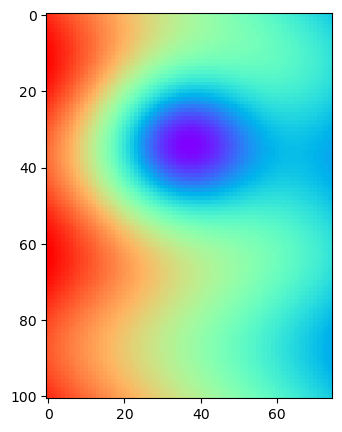

In [4]:
fig= plt.figure(figsize=(5,5))
ax = plt.gca()
ax.imshow(z,cmap='rainbow')

So, if this is 500 hPa heights where low values (blues) are in the north and high values (red) are in the south, then we need to switch
the x and y axes

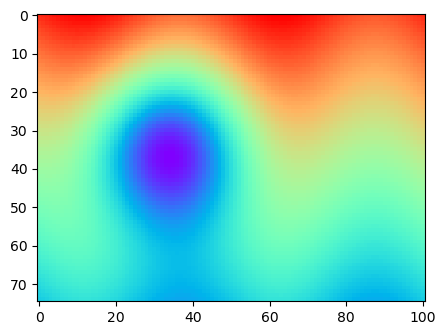

In [5]:
fig= plt.figure(figsize=(5,5))
ax = plt.gca()
ax.imshow(z.T,cmap='rainbow')

That is upside down, so we need to put the origin in the lower left not the upper left. Think about it as if this is a "spreadsheet". 0 is in the upper left, but on the earth in the Northern Hemisphere, low latitudes are in the lower left

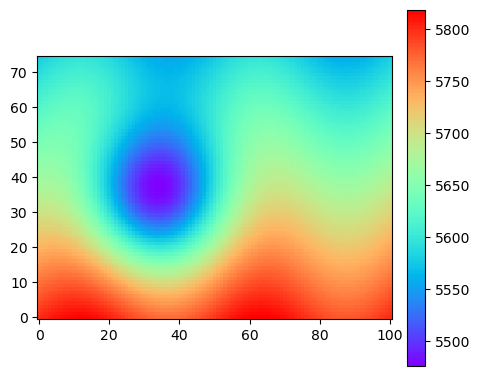

In [6]:
fig= plt.figure(figsize=(5,5))
ax = plt.gca()
im= ax.imshow(z.T,cmap='rainbow',origin='lower')
#add a colorbar to get a feel for the values
plt.colorbar(im,fraction=0.046, pad=0.04)

imshow is a convenient way to get a feel for a data set but not great for actually a final figure

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'G

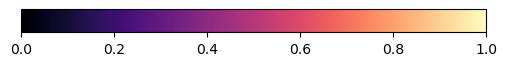

BuGn


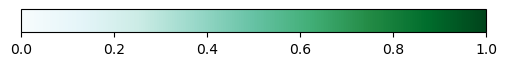

PuBu


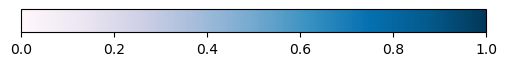

Reds


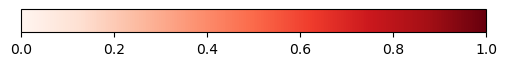

In [7]:
#colormaps- there are many! Don't just use the rainbow one

#see figure 12.12 page 187 too

print(plt.colormaps())

#function to plot one colormap
def plot_colorMaps(cmap):
    import matplotlib as mpl
    fig, ax = plt.subplots(figsize=(6,0.3))
    col_map = plt.get_cmap(cmap)
    mpl.colorbar.ColorbarBase(ax, cmap=col_map, orientation = 'horizontal')
    plt.show()
    
#loop over the first few. Try them all??
for cmap_id in plt.colormaps()[0:40:10]:
    print(cmap_id)
    plot_colorMaps(cmap_id)


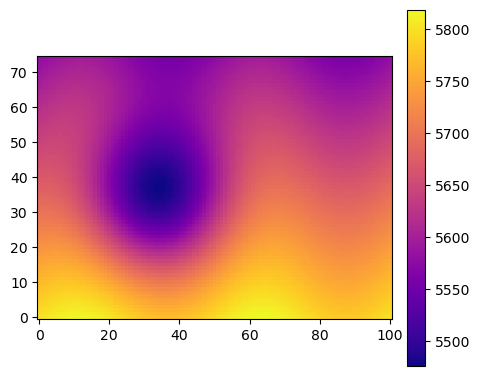

In [8]:
fig= plt.figure(figsize=(5,5))
ax = plt.gca()
im= ax.imshow(z.T,cmap='plasma',origin='lower')
#add a colorbar to get a feel for the values
plt.colorbar(im,fraction=0.046, pad=0.04)

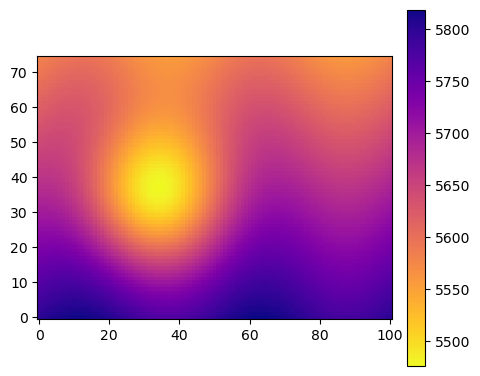

In [9]:
#reverse the color table with _r
fig= plt.figure(figsize=(5,5))
ax = plt.gca()
im= ax.imshow(z.T,cmap='plasma_r',origin='lower')
#add a colorbar to get a feel for the values
plt.colorbar(im,fraction=0.046, pad=0.04)

Rather than plotting the data as an image, contour plots can be created akin to a topographic map. In this example, the array will also be transposed before contouring as this data set's first dimension is for columns, and the second is for rows. This is opposite of how matplotlib interprets the ordering of rows vs. columns.

<class 'matplotlib.contour.QuadContourSet'>


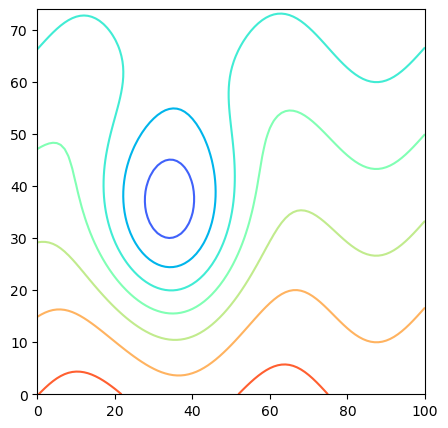

In [10]:
fig= plt.figure(figsize=(5,5))
ax = plt.gca()
#cs is now the contour object
cs=ax.contour(np.transpose(z),cmap='rainbow')
print(type(cs))
plt.savefig('plot_2d_1.png')

If a single argument is fed into the `ax.contour` function, the x and y axes are assumed as 
consecutive integers that span the length of array `z` dimensions (0-100 & 0-74). 
In most case, 2D data sets often contain information about our axes, else the data would be  useless. For the purposes of this example, lets assume our array has a grid spacing of 10 km, 
with the lower left corner of our being positioned at 0 km. 


In [11]:
x = np.arange(0,z.shape[0])*10  #1D array of x values
y = np.arange(0,z.shape[1])*10  #1D array of y values

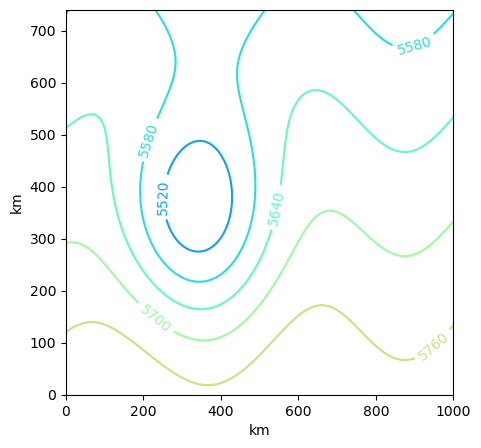

In [12]:
#Now  plot up the data again... add labels
fig= plt.figure(figsize=(5,5))
ax = plt.gca()
cs=ax.contour(x,y,np.transpose(z),levels = range(5400,6000,60),linestyles='-',cmap='rainbow')
ax.clabel(cs,fmt='%.0f',inline=True)
ax.set(xlabel='km')
ax.set(ylabel='km')
plt.savefig('plot_2d_2.png')

There are other ways to control contour plot labels and colors<br>
>- `fontsize`: This is a point value for the size of contour labels
>- `colors`: Specifies the color of  labels and is provided as a string.
See https://matplotlib.org/stable/gallery/color/named_colors.html
>- `inline_spacing`: Numerical value that specifies the number of pixels to leave blank surrounding in-line contour labels
>- `rightside_up`: A boolean value that determines whether labels can be placed upside down.   

# Do it yourself #2
Change the lines to dash lines with fonsize=16 and black (hint colors = 'k' or 'black')
Then change to the color scheme 'magma' (hint  cmap = 'magma')

[Text(0, 0.5, 'km')]

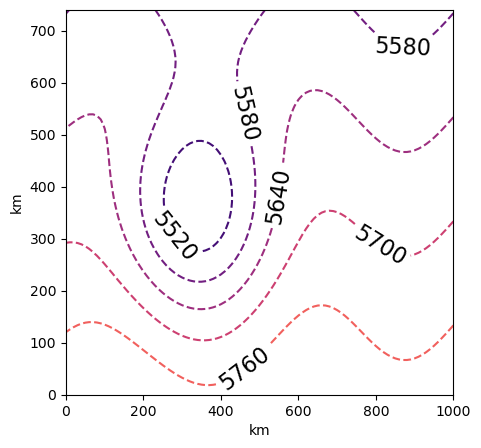

In [13]:
#Now  plot up the data again... add labels
fig= plt.figure(figsize=(5,5))
ax = plt.gca()
cs=ax.contour(x,y,np.transpose(z),levels = range(5400,6000,60),linestyles='--',cmap='magma')
ax.clabel(cs,fmt='%.0f',inline=True,fontsize=16,colors='black')
ax.set(xlabel='km')
ax.set(ylabel='km')

What happens if we set inline to false? What happens if we don't specify a color? Play around with this for a few minutes and see what happens!

Another option similar to imshow (which shows every pixel/grid value) is pcolormesh.  This is potentially a 
good way to plot particurly noisey data sets, which exhibit extreme variability. Sometimes it takes a little trial and error to 
determine the best method for plotting a specific data set.
<br><br>
In the example below is the same data we plotted above, but using the `pcolormesh()`
function instead of `contour()`. The third argument below is the area over which the values are smoothed

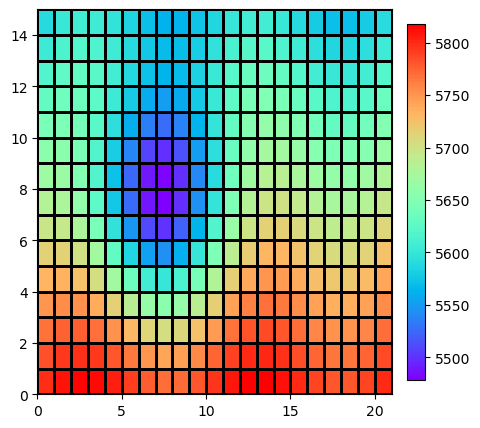

In [14]:
fig= plt.figure(figsize=(5,5))
ax = plt.gca()
#The third argument is the size of the mesh
#ax.pcolormesh(np.transpose(z[::5,::5]),cmap='rainbow')
#uncomment the following to see that the edges of the average 
cm=ax.pcolormesh(np.transpose(z[::5,::5]),cmap='rainbow',edgecolors='black')
plt.colorbar(cm,fraction=0.046, pad=0.04)
plt.savefig('plot_2d_3.png')

A more refined way is to blend contour and color filling. To create color-filled contours, we simply evoke the `contourf()` function

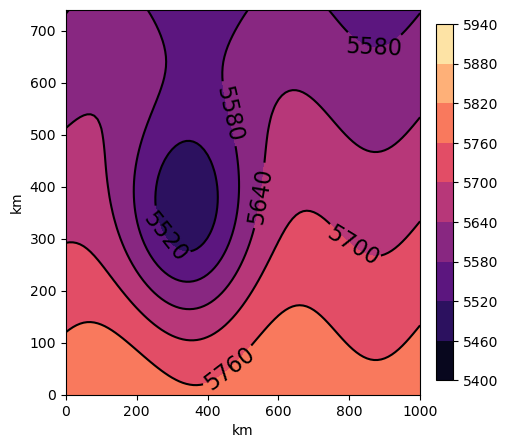

In [15]:
#Now  plot up the data again... add labels
fig= plt.figure(figsize=(5,5))
ax = plt.gca()
cf=ax.contourf(x,y,np.transpose(z),levels = range(5400,6000,60),cmap='magma')
#put the contours on top
cs=ax.contour(x,y,np.transpose(z),levels = range(5400,6000,60),linestyles='-',colors='k')
ax.clabel(cs,fmt='%.0f',inline=True,fontsize=16,colors='black')
plt.colorbar(cf,fraction=0.046, pad=0.04)
ax.set(xlabel='km')
ax.set(ylabel='km')
plt.savefig('plot_2d_4.png')

<br>

# Do it yourself! #2

Now that we've gone over a bunch of plotting options, go ahead and play around and come up with another example

[Text(0, 0.5, 'km')]

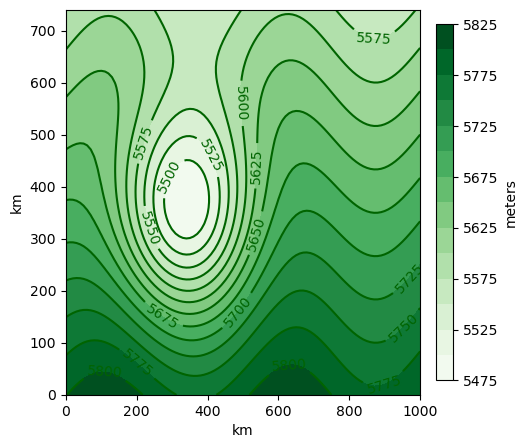

In [16]:
fig= plt.figure(figsize=(5,5))
ax = plt.gca()
cf = ax.contourf(x,y,np.transpose(z),15,cmap = 'Greens')
cl = ax.contour(x,y,np.transpose(z),15,colors='darkgreen')
cb=plt.colorbar(cf,fraction=0.046, pad=0.04)
cb.set_label('meters')
ax.clabel(cl,fmt='%.0f',inline=True)  
ax.set(xlabel='km')
ax.set(ylabel='km')

<br><br>
## Vector, wind barbs, and streamline maps

In addition to making contour maps, Python also has the ability to create two-dimensional 
plots of vector quantities such as winds. Data representing a vector field can be plotted 
using the `plt.quiver()` function. Unlike the `plt.contour()` function, we will need to supply 
 x and y components to plot the vector field (u and v components for wind). 
<br><br>
The `plt.quiver(x,y,u,v,mag)` function has the following arguments:
>- `x`: An array of x coordinates that represents the location of our vector.
>- `y`: An array of y coordinates that represents the location of our vector.
>- `u`: An array of the x-components of our vector field.
>- `v`: An array of the y-components of our vector field.
>- `pivot`: denotes where the tail of the arrow is drawn relative to the data point and is provided as a string (`tip`,`middle`,`tail`).
<br><br>

<br><Br>


In [17]:

#Read in data. Will load gridded geopotential height data and wind data. 
# note that this is a numpy zip'd archive, so there is more than one grid in the archive
V = np.load('./uandv.npz')
x = np.transpose(V['x'])
y = np.transpose(V['y'])
u = np.transpose(V['u'])
v = np.transpose(V['v'])

print(np.shape(u))
print(np.min(x),np.mean(x),np.max(x))
print(np.min(y),np.mean(y),np.max(y))
print(np.min(u),np.mean(u),np.max(u))
print(np.min(v),np.mean(v),np.max(v))

#note that the x and y are nominally define the same dimensions as the shape of the z array
#so the z field is not on the same grid as the  wind fields but we can overlay the fields

(15, 20)
2 49.5 97
2 37.0 72
-53.777288150046914 29.10870247279106 111.16189761340183
-101.62007089921626 0.5441380910968466 105.98815587577462


In [18]:
spd = np.sqrt(u*u+v*v)
print(np.min(spd),np.mean(spd),np.max(spd))

8.628311797357155 49.19427549055735 120.96110337867185


there is a lot to consider in the following plot

- contour fill of wind speed is in green shading and undernearth
- there is an order in which the plots are done. the lowest zorder is underneath and the highest is on top 
- heights are plotted as black contours next
- then the vectors plotted in  colormap on top
- a key is plotted at the bottom right in the figure

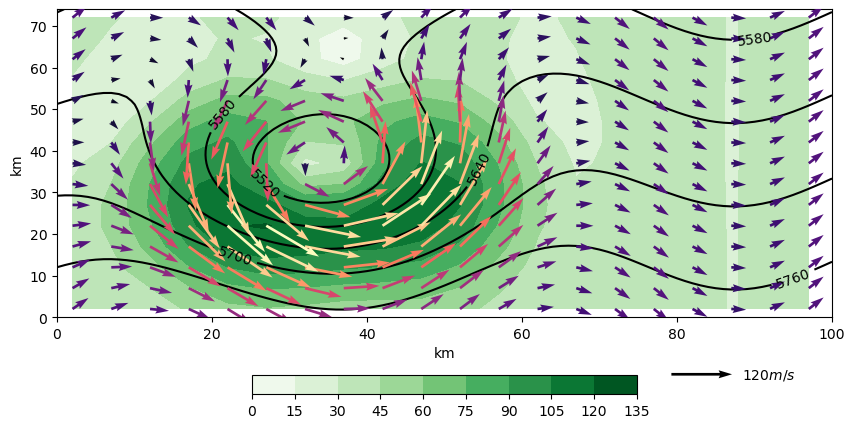

In [19]:
fig,ax = plt.subplots(1,1,figsize=(10,5))
cf=ax.contourf(x,y,spd,cmap = 'Greens',zorder=1)
cz=ax.contour(np.transpose(z),levels = range(5400,6000,60),linestyles='-',colors='k',zorder=2)
Q = ax.quiver(x,y,u,v,spd,pivot='tail',cmap='magma',zorder=3)
qk = ax.quiverkey(Q, 0.8, 0.15, 120, r'$120 m/s$', labelpos='E',
                   coordinates='figure')
cb = plt.colorbar(cf,orientation='horizontal',fraction=0.05)
ax.clabel(cz,fmt='%.0f',inline=True)
ax.set(xlabel='km')
ax.set(ylabel='km')
plt.savefig('plot_2d_5.png')

**Wind barbs:** Python also has the ability to plot wind data as wind barbs. 
The function that plots wind barbs `plt.barbs()` is pretty close the syntax of 
the `plt.quiver()` function as seen below. Every other bard is plotted to thin out the display
<br><br>



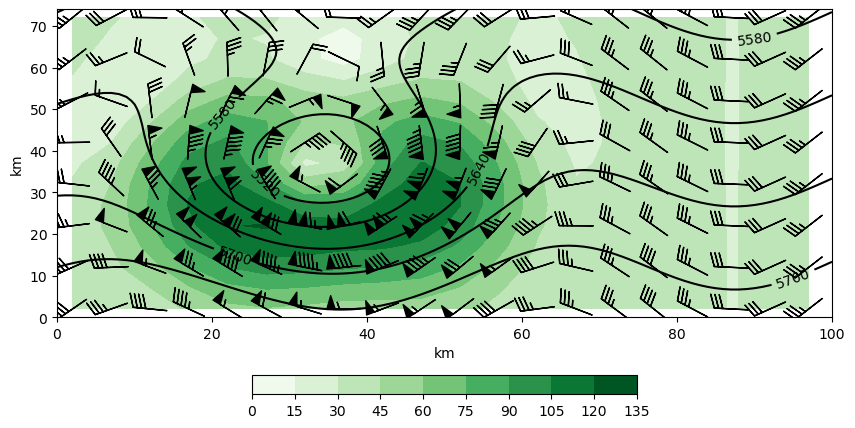

In [20]:
fig,ax = plt.subplots(1,1,figsize=(10,5))
cf=ax.contourf(x,y,spd,cmap = 'Greens',zorder=1)
cz=ax.contour(np.transpose(z),levels = range(5400,6000,60),linestyles='-',colors='k',zorder=2)
ax.barbs(x[::2],y[::2],u[::2],v[::2],pivot='middle',zorder=3)
cb = plt.colorbar(cf,orientation='horizontal',fraction=0.05)
ax.clabel(cz,fmt='%.0f',inline=True)
ax.set(xlabel='km')
ax.set(ylabel='km')
plt.savefig('plot_2d_6.png')

**Streamlines:** Finally, we also have the streamline function `plt.streamplot()` at our disposal for plotting wind fields as stream lines. Like the `plt.barbs()` and `plt.quiver()` functions, we need arguments for both x and y- components of our vector:
<br><br>


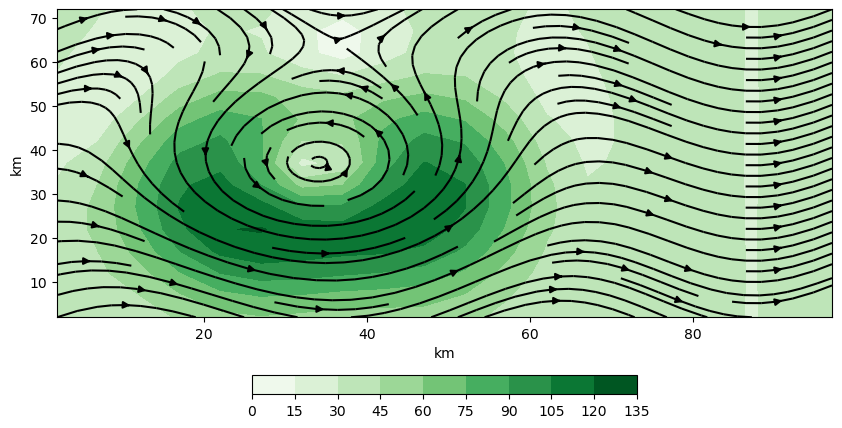

In [21]:
fig,ax = plt.subplots(1,1,figsize=(10,5))
cf=ax.contourf(x,y,spd,cmap = 'Greens',zorder=1)
ax.streamplot(x,y,u,v,density=1,color='black',zorder=2)
cb = plt.colorbar(cf,orientation='horizontal',fraction=0.05)
ax.set(xlabel='km')
ax.set(ylabel='km')
plt.savefig('plot_2d_6.png')

<br>

# Do it yourself! #3

Open up two files: 'wrf_hght_Utah.npy' and 'wrf_temp_Utah.npy' which can be found from the following path:
<br><br>
*/uufs/chpc.utah.edu/common/home/u0703457/atmos_5340/data*
<br><br>
'wrf_hght_Utah.npy' contains terrain height data for northern Utah in units of meters
<br><br>
'wrf_temp_Utah.npy' contains 2-m temperature data for northern Utah in units of Celsius
<br><br>
For this excercise, students are encouraged to plot up each of these files as seperate contour/filled contour maps. While plotting up this data try (1) zooming in on different areas by subsetting the arrays, (2) creating contour maps with different python color tables, (3) adding color bars, (4) overlaying the contour maps on top each other, and (5) identifying whether there is any sort of relationship between terrain height and temperature.
    


In [22]:
h = np.load('./wrf_hght_Utah.npy')
t = np.load('./wrf_temp_Utah.npy')
print(np.shape(h))
print(np.shape(t))
print(np.min(h),np.mean(h),np.max(h))
print(np.min(t),np.mean(t),np.max(t))

(171, 171)
(171, 171)
1260.9519 1794.598 3351.3242
-3.6358948 9.885753 18.012695


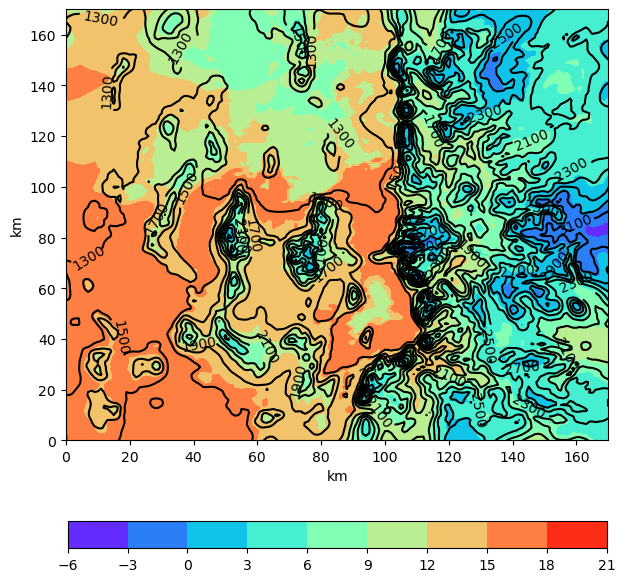

In [23]:
fig,ax = plt.subplots(1,1,figsize=(7,7))
# Hide the Figure name at the top of the figure
fig.canvas.header_visible = False
# Always showthe toolbar
fig.canvas.toolbar_visible = True
cf=ax.contourf(t,cmap = 'rainbow',zorder=1)
cz=ax.contour(h,levels = range(1300,3300,200),linestyles='-',colors='k',zorder=2)
cb = plt.colorbar(cf,orientation='horizontal',fraction=0.05)
ax.clabel(cz,fmt='%.0f',inline=True)
ax.set(xlabel='km')
ax.set(ylabel='km')
plt.savefig('plot_2d_7.png')

<br><br>

# Want more practice!?

Check out the following webpages:<br>
https://www.johnny-lin.com/pyintro/ed01/free_pdfs/ch09.pdf<br>
https://www.tutorialspoint.com/matplotlib/matplotlib_contour_plot.htm<br>
https://www.tutorialspoint.com/matplotlib/matplotlib_quiver_plot.htm<br>
https://pythonforundergradengineers.com/quiver-plot-with-matplotlib-and-jupyter-notebooks.html<br>
https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.15-Quiver-and-Stream-Plots/<br>
https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/advanced_plotting.html<br>
https://uoftcoders.github.io/studyGroup/lessons/python/cartography/lesson/<br>
https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html<br>
    